In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [2]:
credit=pd.read_csv('./credit_scoring.csv',sep=";",header=0)
credit.head(3)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0


In [8]:
X=credit.iloc[:,:13].values
Y=credit.iloc[:,13].values


In [16]:
NBP=np.sum(Y==1)/len(Y)
NBM=np.sum(Y==0)/len(Y)
print('Bon Payeurs : {0:.2f}, Mauvais Payeurs : {1:.2f}'.format(NBP*100,NBM*100))

Bon Payeurs : 72.21, Mauvais Payeurs : 27.79


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

In [44]:
def classifieurs(Xtrain,Xtest,Ytrain,Ytest):
    print('***********DT****************')
    DT=DecisionTreeClassifier(criterion='gini',random_state=1)
    DT.fit(Xtrain,Ytrain)
    YDT=DT.predict(Xtest)

    display(confusion_matrix(Ytest,YDT))
    print('Accuracy {0:.2f}%'.format(accuracy_score(Ytest,YDT)*100))
    print('Précision {0:.2f}%'.format(precision_score(Ytest,YDT)*100))

    print('********KNN*****************')
    KNN=KNeighborsClassifier(n_neighbors=5)
    KNN.fit(Xtrain,Ytrain)
    YKNN=KNN.predict(Xtest)

    display(confusion_matrix(Ytest,YKNN))
    print('Accuracy {0:.2f}%'.format(accuracy_score(Ytest,YKNN)*100))
    print('Précision {0:.2f}%'.format(precision_score(Ytest,YKNN)*100))

    print('********MLP*****************')
    MLP=MLPClassifier(hidden_layer_sizes=(40,20),random_state=1)
    MLP.fit(Xtrain,Ytrain)
    YMLP=MLP.predict(Xtest)

    display(confusion_matrix(Ytest,YMLP))
    print('Accuracy {0:.2f}%'.format(accuracy_score(Ytest,YMLP)*100))
    print('Précision {0:.2f}%'.format(precision_score(Ytest,YMLP)*100))

In [45]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

***********DT****************


array([[ 325,  279],
       [ 318, 1266]])

Accuracy 72.71%
Précision 81.94%
********KNN*****************


array([[ 189,  415],
       [ 187, 1397]])

Accuracy 72.49%
Précision 77.10%
********MLP*****************


array([[ 436,  168],
       [ 532, 1052]])

Accuracy 68.01%
Précision 86.23%


In [42]:
SS=StandardScaler()
SS.fit(Xtrain)
Xtrain_norm=SS.transform(Xtrain)
Xtest_norm=SS.transform(Xtest)

In [46]:
classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

***********DT****************


array([[ 322,  282],
       [ 315, 1269]])

Accuracy 72.71%
Précision 81.82%
********KNN*****************


array([[ 286,  318],
       [ 223, 1361]])

Accuracy 75.27%
Précision 81.06%
********MLP*****************


array([[ 342,  262],
       [ 227, 1357]])

Accuracy 77.65%
Précision 83.82%


In [48]:
pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=pca.transform(Xtrain_norm)
Xtest_pca=pca.transform(Xtest_norm)

Xtrain_pca=np.concatenate((Xtrain_norm,Xtrain_pca),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,Xtest_pca),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

***********DT****************


array([[ 351,  253],
       [ 324, 1260]])

Accuracy 73.63%
Précision 83.28%
********KNN*****************


array([[ 283,  321],
       [ 212, 1372]])

Accuracy 75.64%
Précision 81.04%
********MLP*****************


array([[ 318,  286],
       [ 217, 1367]])

Accuracy 77.01%
Précision 82.70%


## Importance des variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


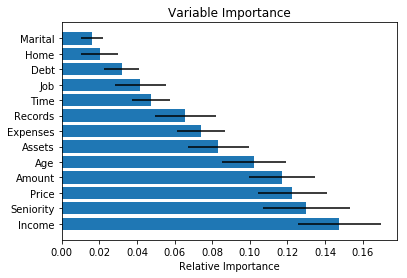

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,random_state=1)
clf.fit(Xtrain_norm, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]


features =credit.columns[:-1] 
print(features[sorted_idx])
padding = np.arange(Xtrain_norm.size/len(Xtrain_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

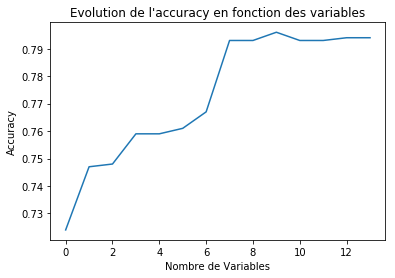

In [68]:
MLP=MLPClassifier('activation 'tanh', 'hidden_layer_sizes': (40, 10), 'solver': 'sgd'random_state=1)
scores=np.zeros(Xtrain_norm.shape[1]+1)
for f in np.arange(0, Xtrain_norm.shape[1]+1):
    X1_f = Xtrain_norm[:,sorted_idx[:f+1]]
    X2_f = Xtest_norm[:,sorted_idx[:f+1]] 
    MLP.fit(X1_f,Ytrain)
    YMLP=MLP.predict(X2_f) 
    scores[f]=np.round(accuracy_score(Ytest,YMLP),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

## Tuning des paramètres du MLP

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'),
              'solver' : ('lbfgs', 'sgd', 'adam'),
             'hidden_layer_sizes' : ((40,20),(40,10))
             }
MLP=MLPClassifier(random_state=1)
Grille = GridSearchCV(MLP, parameters,cv=10,scoring='accuracy')
Grille.fit(Xtrain_norm,Ytrain)
#Grille.fit(Xtrain_norm[:,sorted_idx[:9]],Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [78]:
print(Grille.best_params_)
MLP=Grille.best_estimator_
MLP.fit(Xtrain_norm,Ytrain)
YMLP=MLP.predict(Xtest_norm)
print('Accuracy {0:.2f}%'.format(accuracy_score(Ytest,YMLP)*100))

{'activation': 'tanh', 'hidden_layer_sizes': (40, 10), 'solver': 'sgd'}
Accuracy 79.30%


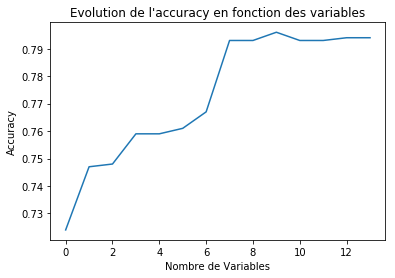

In [79]:
MLP=Grille.best_estimator_
scores=np.zeros(Xtrain_norm.shape[1]+1)
for f in np.arange(0, Xtrain_norm.shape[1]+1):
    X1_f = Xtrain_norm[:,sorted_idx[:f+1]]
    X2_f = Xtest_norm[:,sorted_idx[:f+1]] 
    MLP.fit(X1_f,Ytrain)
    YMLP=MLP.predict(X2_f) 
    scores[f]=np.round(accuracy_score(Ytest,YMLP),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

In [ ]:
('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),

## Création de pipeline

In [83]:
from sklearn.pipeline import Pipeline
import pickle

In [84]:
P = Pipeline([('SS',StandardScaler()),
                ('classifieur',MLPClassifier(activation='tanh',solver='sgd',
                    hidden_layer_sizes=(40,10),random_state=1))
                    ])
P.fit(X,Y)

pickle.dump(P,open('credit_cla.pkl','wb'))

## Comparaison de plusieurs classifieurs


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import KFold,cross_val_score
import time

In [88]:
clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'BAG': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),n_estimators=100,random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1)


}

In [91]:
def run_classifieurs(X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))


In [92]:
run_classifieurs(X,Y)

Accuracy for RF is: 0.785 +/- 0.014 en 3.361s
Accuracy for KNN is: 0.720 +/- 0.022 en 0.137s
